CUSTOMER SEGMENTATION USING RFM ANALYSIS FOR A RETAIL COMPANY

Objective:

To segment customers based on their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis and derive actionable insights for targeted marketing strategies.
Dataset Overview:


The dataset includes details from a single invoice on 2009 to 2011, with the following columns

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal. The name of the country where a customer resides.:d Kingdom

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#turn warning off
import warnings
warnings.filterwarnings('ignore')

In [395]:
excel_file =r"C:\Users\vanda\Downloads\online_retail_II.xlsx"


In [396]:
table1 = pd.read_excel(excel_file, sheet_name='Year 2009-2010')
table2 = pd.read_excel(excel_file, sheet_name='Year 2010-2011')


In [397]:
df= pd.concat([table1,table2])
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


DATA EXPLORATION

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [400]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

The Null values appear at "Description" and " Customer ID"

In [402]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [403]:
# Analyze invoice patterns for negative quantities
return_invoices = df[df['Quantity'] < 0]['Invoice'].unique()

In [404]:
print("Return Invoices:")
print(return_invoices)

Return Invoices:
['C489449' 'C489459' 489464 ... 'C581499' 'C581568' 'C581569']


In [405]:
# Check for potential data entry errors
potential_eturns_ancellations = df[(df['Quantity'] < 0) & (df['Invoice'].isin(return_invoices))]

In [406]:
print("Potential Returns or Cancellations:")
display(potential_eturns_ancellations)

Potential Returns or Cancellations:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


From the output we can understand that the negative values might cause Product Returns or Cancellations. 

The Reason:  Since returns are effectively sales in reverse, the quantity becomes negative to reduce the item count, but the original sales price remains unchanged to reflect the revenue adjustment.

For Example: Customer in Australia with Customer ID"16321.0" returned 12 PAPER BUNTING WHITE LACE, 6 CREAM FELT EASTER EGG BASKET, 4 POTTING SHED SOW 'N' GROW in 2009-12-01 at 10:33:00

In [408]:
#This step is to how the returns impacts to business of this company
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['Price']

# Separate returns and sales
returns = df[df['Quantity'] < 0]
sales = df[df['Quantity'] >= 0]

# Analyze returns
return_analysis = returns.groupby('StockCode').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Calculate net sales
total_sales = sales['TotalPrice'].sum()
total_returns = returns['TotalPrice'].sum()
net_sales = total_sales - total_returns

# Display the results
print(f"Total Sales: {total_sales}")
print(f"Total Returns: {total_returns}")
print(f"Net Sales: {net_sales}")

Total Sales: 20814291.998000003
Total Returns: -1527041.4300000002
Net Sales: 22341333.428000003


In [409]:
# Find and list all entries with negative prices.
negative_prices = df[df['Price'] < 0]
display(negative_prices)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,-53594.36
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,-44031.79
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,-38925.87
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


From the output we can understand that the negative values in Price might a discount or price adjustment.

The Reason: Negative prices here serve to subtract from the revenue without affecting the item count, commonly used in discounts or rebates applied after the transaction.

For Example: in the above cases, These present a bad debt write-off, reducing the company's revenue to account for uncollectible debt from customers

NOTE: 
1. Negative Quantity and Positive Price:
   
Interpretation: This generally indicates a product return where the quantity of items returned is shown as negative (e.g., -5 for 5 items returned), but the price remains positive.

2. Negative Quantity and Negative Price:

Interpretation: This combination often indicates a full cancellation or credit adjustment. In such cases, both quantity and price are negative to account for a complete reversal of the transaction.

3. Positive Quantity and Negative Price:

Interpretation: This usually signifies a discount or price adjustment rather than a return. The quantity remains positive, indicating the items were still purchased, but the price reduction reflects a partial refund or adjustment for the original sale.

CLEANING DATA

In [413]:
# After exploring the data process, I realized that the negative values in the" Quantity" column have the 6-digit format 
df["Invoice"] = df["Invoice"].astype("str")

mask = (
         df["Invoice"].str.match("^\\d{6}$") == True
)

df = df[mask]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [414]:
# After exploring the data process, I realized that the negative values in the" Price" column have the format that contains “PADS” and start with exactly 5 digits followed by one or more letters. 
df["StockCode"] = df["StockCode"].astype("str")

mask = (
    (df["StockCode"].str.match("^\\d{5}$") == True)
    | (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (df["StockCode"].str.match("^PADS$") == True)
)

df = df[mask]

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [415]:
#Drop Customer ID column
df.dropna(subset=["Customer ID"], inplace=True)

In [416]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,802711.000000,802711,802711.000000,802711.000000,802711.000000
mean,13.336280,2011-01-02 09:20:34.073732864,2.930474,15338.065410,21.719461
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,2.000000,2010-07-07 11:53:00,1.250000,13988.000000,4.950000
50%,5.000000,2010-12-03 14:54:00,1.950000,15276.000000,11.800000
75%,12.000000,2011-07-28 13:02:00,3.750000,16809.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,144.542222,NaN,4.275804,1693.929085,222.560462


In [417]:
len(df[df['Price']==0])

62

In [418]:
cleaned_df= df[df['Price']>0]

In [419]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,802649.000000,802649,802649.000000,802649.000000,802649.000000
mean,13.318950,2011-01-02 09:19:54.210121984,2.930701,15338.153000,21.721138
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-07-07 11:53:00,1.250000,13988.000000,4.950000
50%,5.000000,2010-12-03 14:54:00,1.950000,15276.000000,11.800000
75%,12.000000,2011-07-28 13:02:00,3.750000,16809.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,143.867456,NaN,4.275891,1693.901255,222.568976


    SEGMENTATION ANALYSIS

In [421]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("TotalPrice", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77352.96,3,2011-01-18 10:01:00
1,12347.0,5633.32,8,2011-12-07 15:52:00
2,12348.0,1658.40,5,2011-09-25 13:13:00
3,12349.0,3678.69,3,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00


In [422]:
# RFM Model
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77352.96,3,2011-01-18 10:01:00,325
1,12347.0,5633.32,8,2011-12-07 15:52:00,1
2,12348.0,1658.40,5,2011-09-25 13:13:00,74
3,12349.0,3678.69,3,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


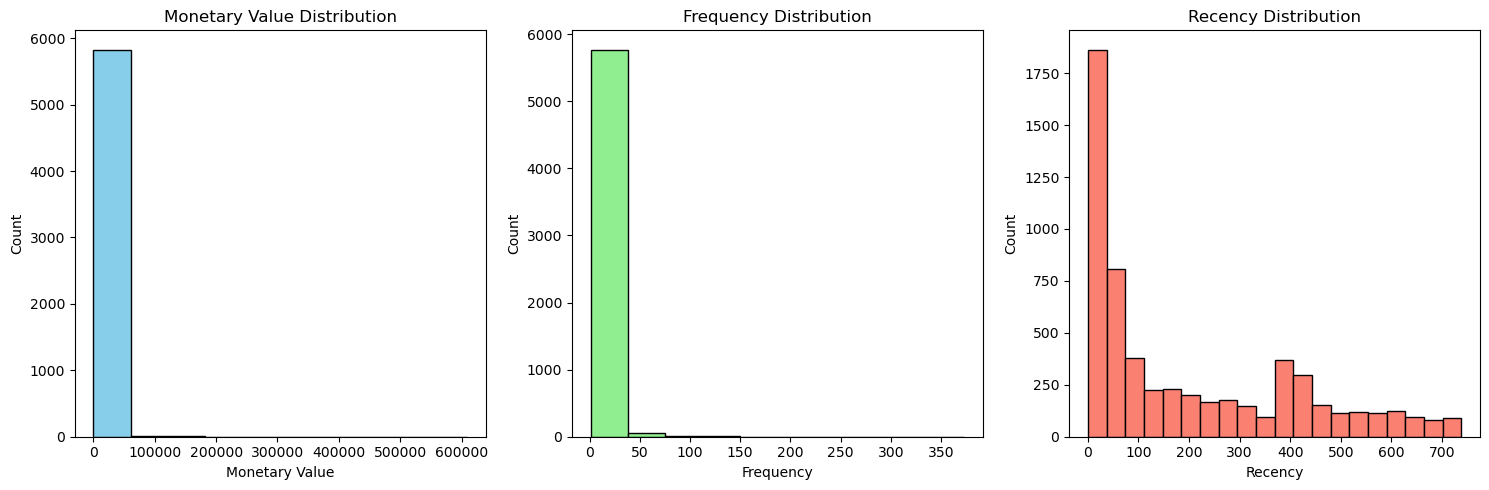

In [423]:
#Visualize the distribution of RFM
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


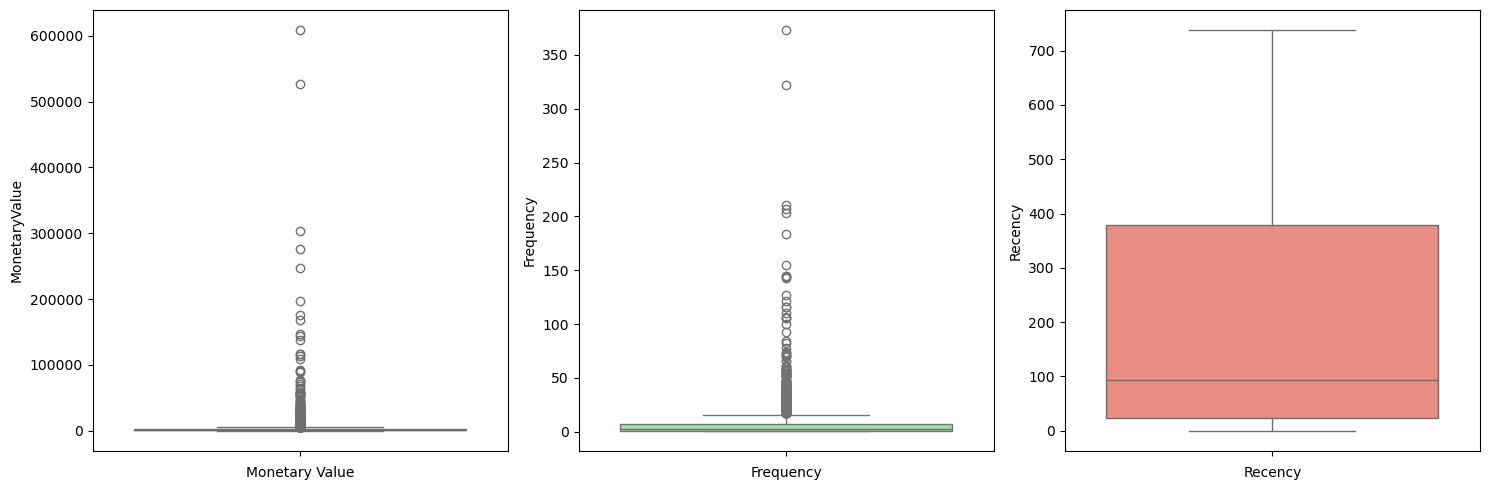

In [424]:
# Visualize the Boxplot for RFM
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data= aggregated_df['MonetaryValue'], color='skyblue')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data= aggregated_df['Frequency'], color='lightgreen')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data= aggregated_df['Recency'], color='salmon')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


-Monetary Value Boxplot  shows outliers as dots above

-Frequency Boxplot  shows outliers as dots above

-There are no outlier in Recency .
)

In [426]:
# Use IQR() method to remove outliers
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.000000,620.000000,620.000000,620,620.000000
mean,15077.782258,18260.636545,25.983871,2011-10-19 01:33:52.548387072,50.983871
min,12346.000000,5217.440000,1.000000,2010-01-17 11:33:00,0.000000
25%,13573.000000,6591.865000,12.000000,2011-10-23 01:02:00,4.000000
50%,14924.000000,9131.805000,18.000000,2011-11-23 12:34:30,16.000000
75%,16607.500000,14486.350000,29.000000,2011-12-05 10:27:30,47.250000
max,18260.000000,608821.650000,373.000000,2011-12-09 12:49:00,691.000000
std,1754.422990,41750.244214,31.132004,NaN,102.874077


In [427]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.000000,424.000000,424.000000,424,424.000000
mean,15373.747642,21143.851403,34.870283,2011-11-08 06:13:43.160377344,30.787736
min,12415.000000,1820.440000,17.000000,2010-05-12 16:51:00,0.000000
25%,13851.000000,6368.085000,20.000000,2011-11-15 04:14:45,2.750000
50%,15306.000000,9760.710000,25.000000,2011-11-30 11:27:30,9.000000
75%,16947.250000,16691.300000,35.000000,2011-12-06 12:59:15,24.000000
max,18283.000000,608821.650000,373.000000,2011-12-09 12:49:00,575.000000
std,1777.616900,49369.498858,34.677844,NaN,70.627095


In [428]:
#choose only non ouliers values from Monetary and frequency
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.000000,5167.000000,5167.000000,5167,5167.000000
mean,15341.723437,1133.523987,3.689181,2011-05-04 02:42:25.140313600,218.895878
min,12348.000000,2.950000,1.000000,2009-12-01 10:49:00,0.000000
25%,13862.500000,311.030000,1.000000,2010-11-11 13:06:30,32.000000
50%,15355.000000,717.510000,3.000000,2011-07-28 14:08:00,133.000000
75%,16811.500000,1579.130000,5.000000,2011-11-06 13:22:30,392.000000
max,18287.000000,5202.970000,16.000000,2011-12-09 12:50:00,738.000000
std,1705.112291,1128.972117,3.194642,NaN,211.118300


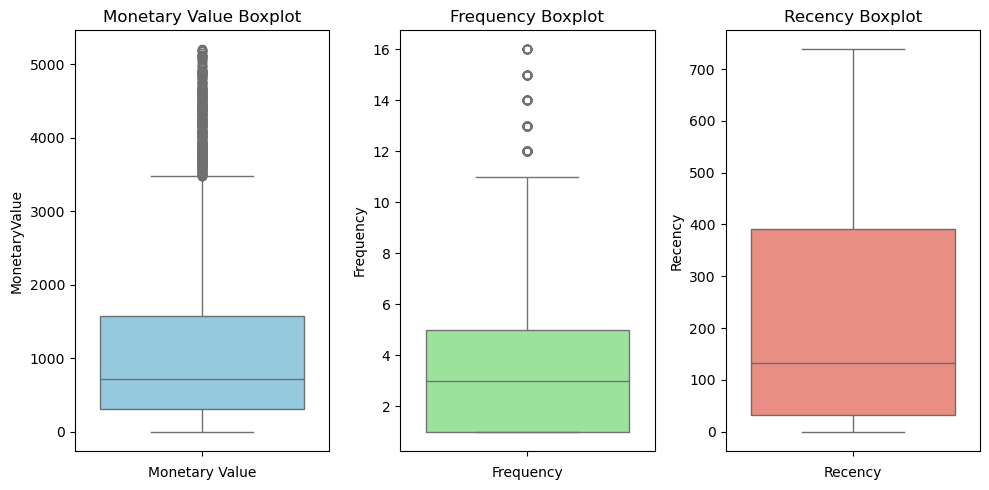

In [429]:
# check outliers again
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [430]:
#This code is used to standardize the data in the non_outliers_df
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.46495994,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706855,  1.03646654, -0.8379804 ]])

In [431]:
# Creating a new DataFrame from the standardized data and assigns index and column names. 
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.464960,0.410358,-0.686392
3,2.254628,-0.215751,-0.951672
4,-0.743336,-0.841860,0.426836
5,-0.737551,-0.841860,0.734750
6,0.527979,1.662575,-0.871140
...,...,...,...
5846,-0.846404,-0.528806,-1.003780
5848,-0.639443,-0.841860,1.004767
5849,-0.670165,-0.841860,2.089572
5850,0.100017,-0.528806,1.217938


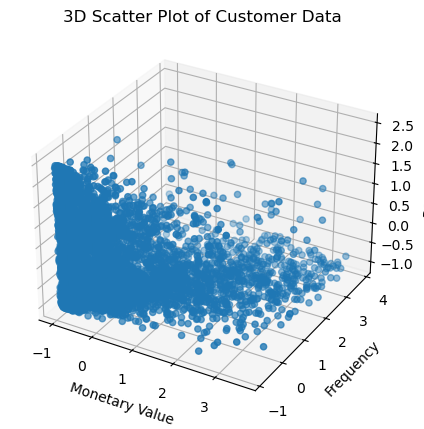

In [432]:
fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

CLUSTER ANALYSIS

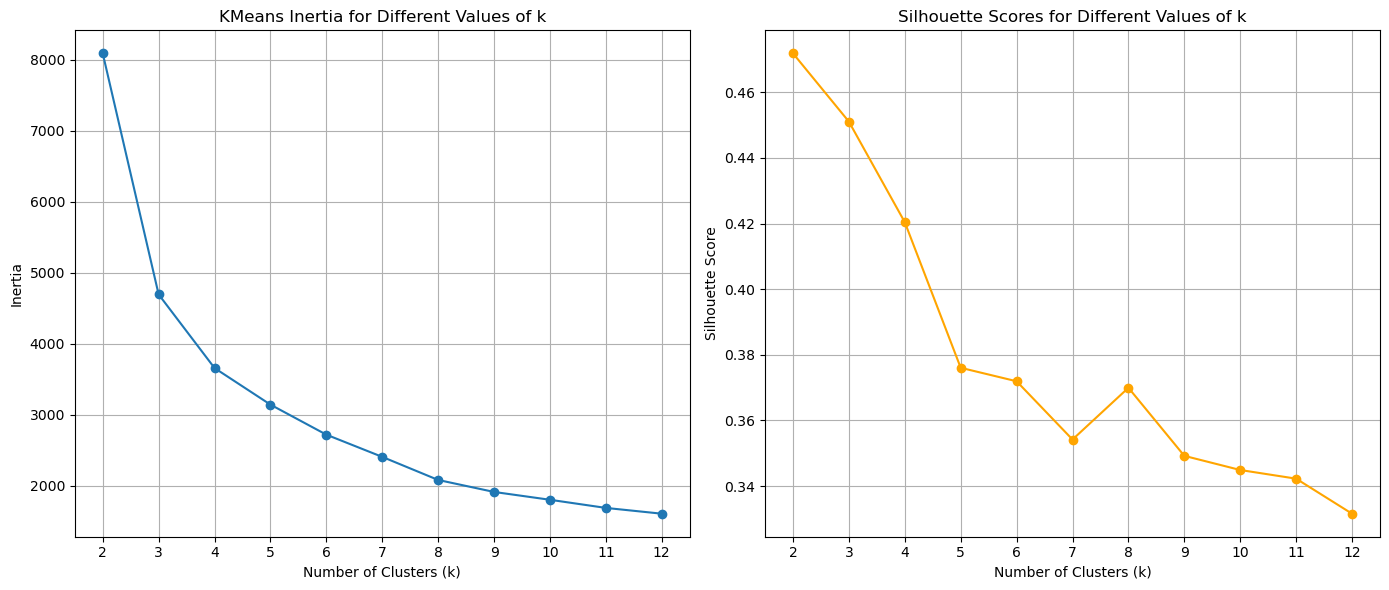

In [434]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


It is easily see that 2 got the highest point by the Silhouette graph(the right graph). However, if choose 2,  it may oversimplify the data structure.Otherwise, in The elbow graph (the left graph), the elbow point 2 doesn't show a clear elbow at k=2. There's still a significant drop in within-cluster sum of squares (WCSS) when moving from 2 to 3 clusters. 

In this case, 3 or 4 are ok, but I would choose 4 coz I want my cluster to be clearer and detailed

In [436]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.0,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12351.0,300.93,1,2010-11-29 15:23:00,374,1
6,12352.0,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5846,18282.0,178.05,2,2011-12-02 11:43:00,7,3
5848,18284.0,411.68,1,2010-10-04 11:33:00,431,1
5849,18285.0,377.00,1,2010-02-17 10:24:00,660,1
5850,18286.0,1246.43,2,2010-08-20 11:57:00,476,1


In [437]:
non_outliers_df['Cluster'] = non_outliers_df['Cluster'].astype(int)

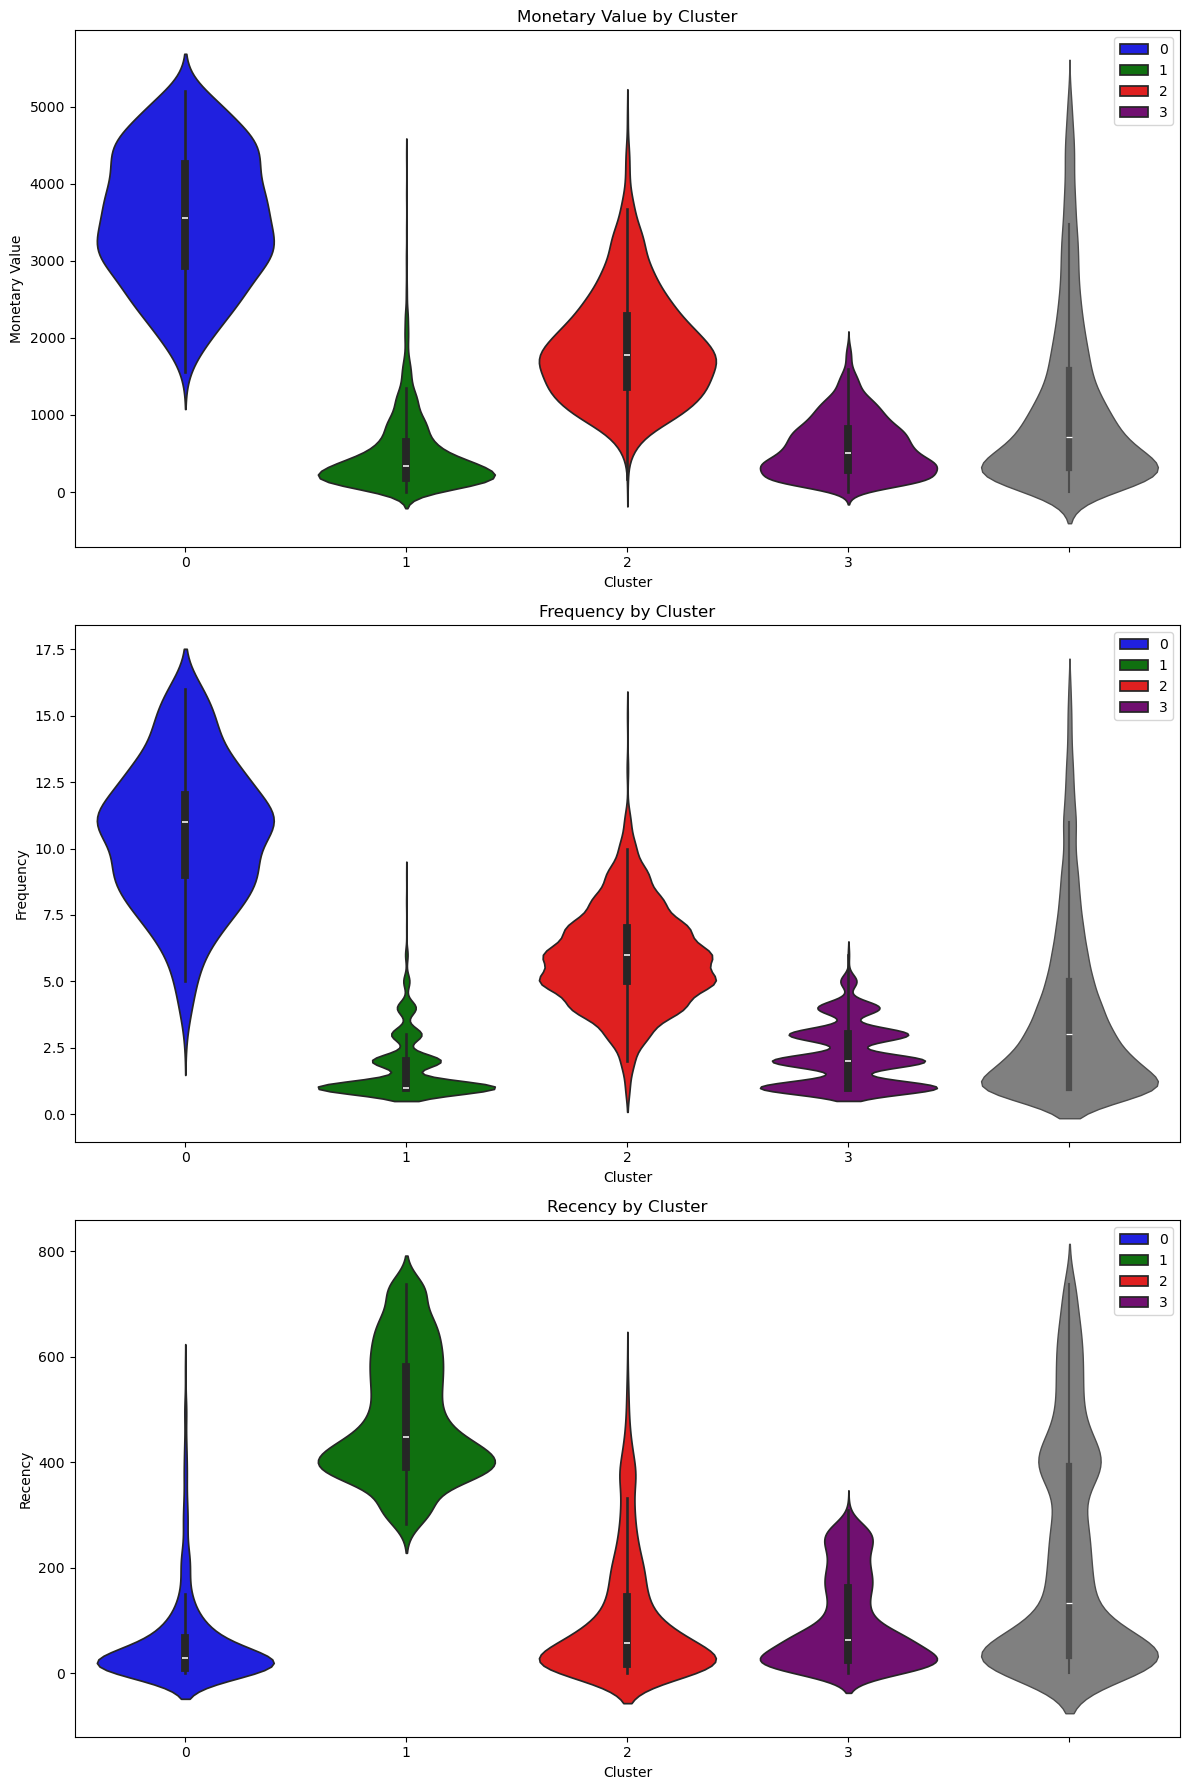

In [438]:
# Define the palette with all necessary keys
cluster_colors = {0: "blue", 1: "green", 2: "red", 3: "purple"}

plt.figure(figsize=(12, 18))
# Plot Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Plot Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Plot Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


Cluster 0 (Blue) 'VIP Shoppers':

High Monetary Value
High Frequency
Very Low Recency (most recent purchases)
Interpretation: These are the best customers - high-value, frequent buyers who have purchased very recently. They're likely loyal and highly engaged customers.

Cluster 1 (Green) "Lapsed Big Spenders":

Low Monetary Value
Low Frequency
Highest Recency (least recent purchases)
Interpretation: These customers haven't bought in a long time, don't buy often, and spend little. They might be at risk of churning or could be one-time buyers.

Cluster 2 (Red) "Regular Midrange Customers":

Medium Monetary Value
Medium Frequency
Low to Medium Recency
Interpretation: These are solid, mid-tier customers. They buy somewhat regularly and spend a moderate amount. There's potential to increase their engagement.

Cluster 3 (Purple) "New or Occasional Buyers":

Low Monetary Value
Low Frequency
Medium Recency
Interpretation: These customers buy infrequently and spend little, but have made purchases more recently than Cluster 1. They might be new customers or occasional buyers.


In [440]:
cluster_labels = {
    0: "Vip Shoppers",
    1: "Lapsed Big Spenders",
    2: "Regular Midrange Customers",
    3: "New or Occasional Buyers"
}

In [441]:
non_outliers_df["ClusterLabel"] = non_outliers_df["Cluster"].map(cluster_labels)

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.0,1658.40,5,2011-09-25 13:13:00,74,2,Regular Midrange Customers
3,12349.0,3678.69,3,2011-11-21 09:51:00,18,2,Regular Midrange Customers
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1,Lapsed Big Spenders
5,12351.0,300.93,1,2010-11-29 15:23:00,374,1,Lapsed Big Spenders
6,12352.0,1729.54,9,2011-11-03 14:37:00,35,2,Regular Midrange Customers
...,...,...,...,...,...,...,...
5846,18282.0,178.05,2,2011-12-02 11:43:00,7,3,New or Occasional Buyers
5848,18284.0,411.68,1,2010-10-04 11:33:00,431,1,Lapsed Big Spenders
5849,18285.0,377.00,1,2010-02-17 10:24:00,660,1,Lapsed Big Spenders
5850,18286.0,1246.43,2,2010-08-20 11:57:00,476,1,Lapsed Big Spenders


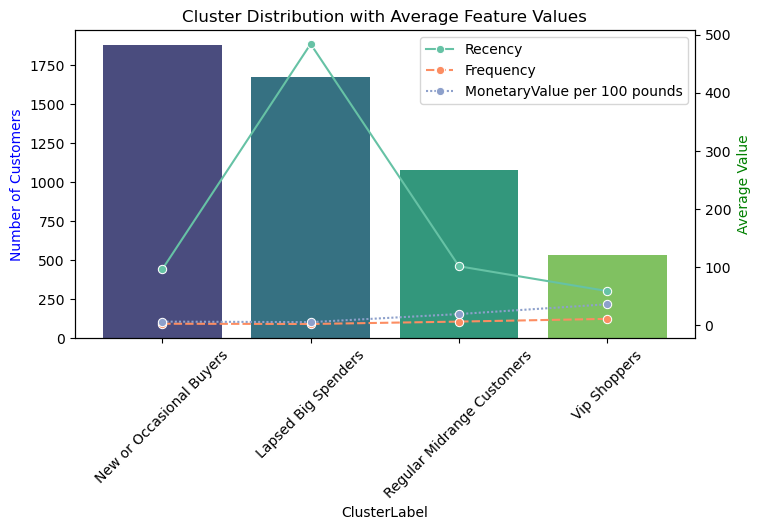

In [496]:
cluster_counts = non_outliers_df['ClusterLabel'].value_counts()
non_outliers_df["MonetaryValue per 100 pounds"] = non_outliers_df["MonetaryValue"] / 100.00
feature_means = non_outliers_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for cluster counts
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')
plt.xticks(rotation=45)
# Line plot for average feature values
ax2 = ax1.twinx()
sns.lineplot(data=feature_means, palette='Set2', marker='o', ax=ax2)
ax2.set_ylabel('Average Value', color='g')


plt.show()


Based on the information provided, including the violin plots, and the context of a retail company using RFM (Recency, Frequency, Monetary Value) analysis, here are recommendations for each cluster:

1.VIP Shoppers (High Monetary Value, High Frequency, Low Recency):

Implement a loyalty program with exclusive benefits
Offer early access to new products or sales
Provide personalized shopping experiences and dedicated customer service
Use their purchasing patterns to inform inventory decisions


2.At-Risk High-Value Customers (Medium-High Monetary Value, Medium Frequency, High Recency):

Launch a targeted win-back campaign with personalized offers
Conduct surveys to understand why they've stopped purchasing
Create special "we miss you" promotions to re-engage them
Consider offering a discount on their favorite products based on past purchases


3.Regular Mid-Range Customers (Medium Monetary Value, Medium Frequency, Medium-Low Recency):

Implement cross-selling and upselling strategies to increase their basket size
Create bundle offers that encourage slightly larger purchases
Offer a mid-tier loyalty program to encourage more frequent visits
Use personalized product recommendations based on their purchase history


4.New or Occasional Buyers (Low Monetary Value, Low Frequency, Medium Recency):

Develop an onboarding email series to educate them about your products and brand
Offer first-time buyer discounts or free shipping to encourage a second purchase
Create engaging content marketing to keep your brand top-of-mind
Use retargeting ads to remind them of your products